# Data Science Project
## RFM Clustering for Targeted Customer Campaigns

**Project Prepared by:** Diaa Aldein Alsayed Ibrahim Osman  
**Prepared for:** Epsilon AI Institute  

**Background:**  
This dataset contains customer transactions from a loyalty system website in India. The goal is to utilize this dataset for customer segmentation and clustering based on their buying behavior. The objective is to create targeted marketing campaigns for each customer, offering recommended merchants that best fit the customer's segment or cluster.

**Project Overview:**  
Our objective is to develop a sophisticated customer segmentation model that provides personalized recommendations for optimal merchants tailored to each user. This will facilitate the implementation of targeted offers, enhancing the overall user experience.

**Who Will Benefit:**  
This project benefits customers with personalized recommendations, empowers merchants to connect with their ideal audience, and enables marketing teams and decision-makers to optimize strategies. By fostering stronger customer engagement and satisfaction, the project aims to contribute to overall business growth and success.

**Dataset Description:**  
The dataset comprises 43,672 instances and 8 features.

**Features Description:** 

1. **Trx_Rank:**
   - The number of transactions of this customer with this merchant.
   - Non-Null Count: 43,672, Dtype: int64
2. **Points:**
   - The total number of points redeemed from this transaction for the user's wallet.
   - Non-Null Count: 43,672, Dtype: int64
3. **Trx_Vlu:**
   - Transaction Value, the amount of money the customer used in this transaction.
   - Non-Null Count: 43,672, Dtype: float64
4. **Trx_Age:**
   - Transaction Age, indicating when it occurred, i.e., the number of days since the transaction from a specific date.
   - Non-Null Count: 43,672, Dtype: int64
5. **Customer Age:**
   - The age or number of days since the last customer transaction occurred from a specific date (Recency).
   - Non-Null Count: 43,672, Dtype: int64
6. **Category:**
   - The category of the items bought by the customers.
   - Non-Null Count: 43,672, Dtype: object
7. **User_Id:**
   - The user ID, a unique customer ID in the data frame.
   - Non-Null Count: 43,672, Dtype: int64
8. **Mer_Name:**
   - The name of the merchant from which the customer made the purchase.
   - Non-Null Count: 43,672, Dtype: object

In [182]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import joblib

In [2]:
# loading the dataset.
data = pd.read_csv("cleaned_data.csv")
data

,trx_rank,points,trx_vlu,trx_age,customer_age,category,user_id,mer_name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [3]:
# Geitting Information about the Data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_rank      43672 non-null  int64  
 1   points        43672 non-null  int64  
 2   trx_vlu       43672 non-null  float64
 3   trx_age       43672 non-null  int64  
 4   customer_age  43672 non-null  int64  
 5   category      43672 non-null  object 
 6   user_id       43672 non-null  int64  
 7   mer_name      43672 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ MB


In [4]:
data.duplicated().sum()

0

In [5]:
# creating copy of the data as df
df = data.copy()

## 1. Statistical analysis:

In [6]:
# statistcal description for numeric features
round(df.describe(),2)

,trx_rank,points,trx_vlu,trx_age,customer_age,user_id
count,43672.00,43672.00,43672.00,43672.00,43672.00,43672.00
mean,1.27,3312.25,331.22,185.19,144.03,17173.41
std,0.78,5756.37,575.64,121.99,114.76,9665.40
min,1.00,20.00,2.00,1.00,1.00,0.00
25%,1.00,1220.00,122.00,62.00,34.00,8710.75
50%,1.00,1893.50,189.35,203.00,115.00,17561.00
75%,1.00,3100.00,310.00,271.00,252.00,25634.25
max,17.00,263800.00,26380.00,698.00,682.00,33518.00


In [7]:
# statistcal description for categorical features
df.describe(include="O")

,category,mer_name
count,43672,43672
unique,7,56
top,Grocery,Rajasthan Handicrafts
freq,30694,19361


* **First Statistical Description for Some Numeric Features:** 

1. **trx_rank:** 
- Ranges from **1** to **17** per user, The mean transaction rank is **1.27**, and the median is **1**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper transaction rank per user values.
2. **points:** Ranges from **20** to **263,800** per transaction, The mean points is **3312.25**, and the median is **1893.50**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper points/transaction values.
3. **trx_vlu:** Ranges from **2** to **26,380** per transaction, The mean is **331.22**, and the median is **189.35**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper trx_vlu values.
4. **trx_age:** Ranges from **1** to **698** days per transaction, The mean is **185.19**, and the median is **203**.  As the mean is less than the median, it reflects that the data is left-skewed, and there are outliers in the lower trx_age values. Also as the min value is 1 Day reflecting that the specific date which set for calculating the age is after one date from last transaction in the data.
5.  **customer_age (Recency):** Ranges from **1** to **682** per user, The mean is **144.03**, and the median is **115**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper customer_age (Recency) values. Also as the min value is 1 Day reflect that the specific date which set for calculating the age is after one date from last transaction in the data.
-----------------------
* **Second Statistical Description for Categorical Features:**

1. **category:** Out of **43,672** values, the most frequented category is **Grocery**, which has **30,694** values out of 7  unique category.
2. **mer_name:** Out of **43,672** values, the most frequented merchant name is **Rajasthan Handicrafts**, which has **19,361** values out of 56  unique merchant name.

## 2. Correlation & Correlation Heatmap:

In [8]:
# Correlation show the relationship between features.
correlation_matrix = round(df.corr(),2)
correlation_matrix

,trx_rank,points,trx_vlu,trx_age,customer_age,user_id
trx_rank,1.00,0.07,0.07,-0.13,-0.18,0.04
points,0.07,1.00,1.00,0.03,0.01,0.02
trx_vlu,0.07,1.00,1.00,0.03,0.01,0.02
trx_age,-0.13,0.03,0.03,1.00,0.70,0.11
customer_age,-0.18,0.01,0.01,0.70,1.00,0.06
user_id,0.04,0.02,0.02,0.11,0.06,1.00


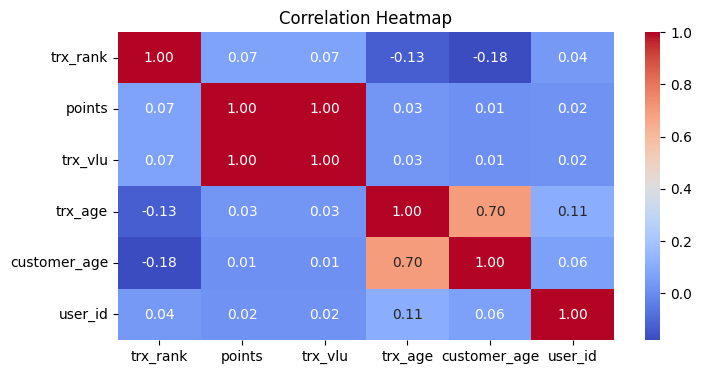

In [9]:
# heatmap visualize the correlation 
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* The correlation analysis reveals that there is a strong positive correlation (1.00) between 'trx_vlu' and 'points,' indicating a direct proportional relationship. Transaction rank ('trx_rank') shows a very weak positive correlation with both 'points' and 'trx_age.' Additionally, 'trx_age' exhibits a moderate positive correlation (0.70) with 'customer_age,' suggesting a relationship between the age of transactions and the recency of customer activity. 

## 3. Analysis and visualization

### 1. What is the top category in the data?

In [10]:
# What is the top category in the data?
cat_dist = df.category.value_counts().nlargest(5)
cat_dist

Grocery            30694
F&B                 7720
Fashion             3333
Health & Beauty     1504
Electronics          228
Name: category, dtype: int64

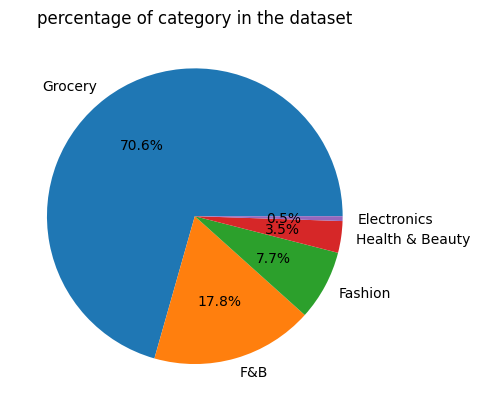

In [11]:
# pie chart show the percentage of each category in dataset
plt.pie(cat_dist, labels=cat_dist.index, autopct='%1.1f%%')
plt.title('percentage of category in the dataset')
plt.show()

* The category distribution table reveals a prominent concentration in the "Grocery" category, accounting for the majority of transactions at 30,694 representing 70.6%. "F&B" (Food and Beverage) follows with 7,720 transactions represnting 17.8%, while 7.7% "Fashion," 3.5% "Health & Beauty," and 0.5% "Electronics" represent smaller portions with 3,333, 1,504, and 228 transactions, respectively. This distribution emphasizes a significant customer engagement in grocery-related transactions within the dataset.

### 2. What is the top 10 merchant name in the dataset?

In [12]:
# What is the top 10 merchant name in the dataset?
top_merchant = df.mer_name.value_counts().sort_values(ascending=False).head(10)
top_merchant

Rajasthan Handicrafts        19361
Saraswati Fabrics             6896
Madurai Music Mania           4269
Jai Hind General Stores       3387
Agra Appliance Arena          2963
Indore Instrument Inn         1470
Amritsar Auto Accessories     1302
Gurgaon Gift Gallery          1012
Mumbai Fashion Hub             907
Pune Perfumes Paradise         553
Name: mer_name, dtype: int64

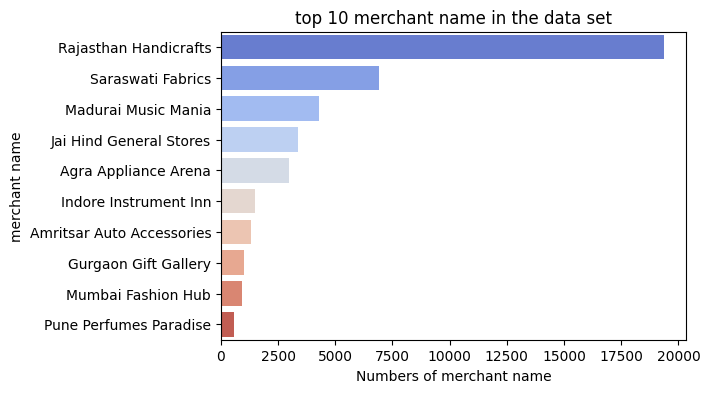

In [13]:
# Barplot chart Reflect the top 10 merchant name in the data set.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_merchant.index, x=top_merchant.values, palette='coolwarm')
plt.ylabel('merchant name')
plt.xlabel('Numbers of merchant name')
plt.title('top 10 merchant name in the data set')
plt.show()

In [14]:
# To which category the highest top merchant belong?
df[df['mer_name'] == 'Rajasthan Handicrafts']['category'].unique()

array(['Grocery'], dtype=object)

### 3. what is the top 3 merchant in each category in general?

In [15]:
# what is the top 3 merchant in each category in general?
cat_list = df.category.unique().tolist()
for cat in cat_list:
    print(f'*** {cat} ***')
    print(df[df['category'] == cat]['mer_name'].value_counts().nlargest(3))
    print('*' * 50)

*** Fashion ***
Agra Appliance Arena       2963
Faridabad Footwear Fair     311
Delhi Electronics            36
Name: mer_name, dtype: int64
**************************************************
*** F&B ***
Jai Hind General Stores      3387
Amritsar Auto Accessories    1302
Gurgaon Gift Gallery         1012
Name: mer_name, dtype: int64
**************************************************
*** Other ***
Ganpati Enterprises          16
Ahmedabad Sweet Mart         12
Kochi Kitchenware Kingdom    12
Name: mer_name, dtype: int64
**************************************************
*** Grocery ***
Rajasthan Handicrafts    19361
Saraswati Fabrics         6896
Madurai Music Mania       4269
Name: mer_name, dtype: int64
**************************************************
*** Transportaion ***
Krishna Textiles    146
Name: mer_name, dtype: int64
**************************************************
*** Electronics ***
Gwalior Garden Gear    133
Thane Tea Traders       43
Nagpur Novelty Nook     25
Name: me

### 4. Which user or customer that have the highest transaction rank?

In [16]:
# Which user or customer that have the highest transaction rank?
df[df['trx_rank'] == 17][['trx_rank','trx_age']]

,trx_rank,trx_age
33126,17,79


* Customer with user_id 19390 has had 17 transactions with the same merchant name, 'Thane Tea Traders,' under the category of Electronics. Transaction number 17 occurred 79 days ago, with a total value of 7338, and the customer redeemed 73380 points from this transaction. Additionally, the 'customer_age' value of 74 days indicates that this customer had a more recent transaction before 74 days with another merchant.

### 5. which customer or user that have the highest transaction value?

In [17]:
# which customer or user that have the highest transaction value?
df[df['trx_vlu'] == 26380]

,trx_rank,points,trx_vlu,trx_age,customer_age,category,user_id,mer_name
21907,8,263800,26380.0,81,74,Grocery,19390,Rajasthan Handicrafts


* The same customer with user_id 19390 has the highest transaction value of 26,380 in the dataset with the merchant name 'Rajasthan Handicrafts' under the category of Grocery. This is the 8th transaction for this user with the same merchant and occurred 81 days ago. However, the user has a more recent transaction before 74 days, which is the latest transaction for this user in dataset.  

In [18]:
# checking customer with user_id 19390 total number of transaction (Frequency)  in the dataset
df[df['user_id'] == 19390]['user_id'].count()

29

In [19]:
# checking total amount of money (Monetary) spent by customer with user_id 19390 in the website or the dataset.
df[df['user_id'] == 19390]['trx_vlu'].sum()

165183.8

### 6. what are the top 5 customer in the data set in term of total expenditure (Monetary)?

In [20]:
# what are the top 5 customer in the data set in term of total expenditure (Monetary)?
top_user_monetary = df.groupby('user_id')['trx_vlu'].sum().nlargest(5)
top_user_monetary

user_id
19390    165183.8
3478      65028.1
12650     47242.4
22380     34260.3
8005      33778.2
Name: trx_vlu, dtype: float64

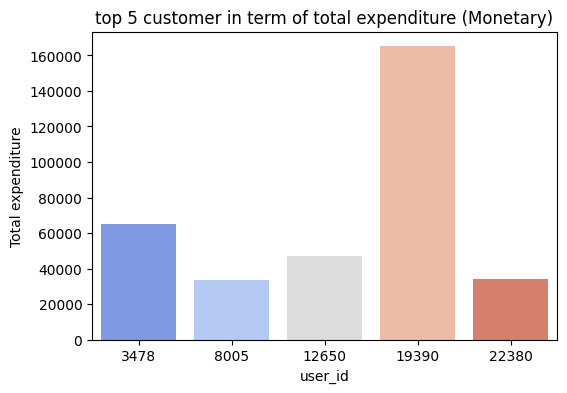

In [21]:
# Barplot chart Reflect the top 5 customer in term of total expenditure (Monetary).
plt.figure(figsize=(6, 4))
sns.barplot(x=top_user_monetary.index, y=top_user_monetary.values, palette='coolwarm')
plt.ylabel('Total expenditure')
plt.xlabel('user_id')
plt.title('top 5 customer in term of total expenditure (Monetary)')
plt.show()

### 7. what are the top 5 customer in the data set in term of total of trnsaction occured (Frequency)? 

In [22]:
# what are the top 5 customer in the data set in term of total of trnsaction occured (Frequency)?
top_user_freq = df.user_id.value_counts().nlargest(5)
top_user_freq 

19390    29
13519    19
1238     19
4360     18
6573     17
Name: user_id, dtype: int64

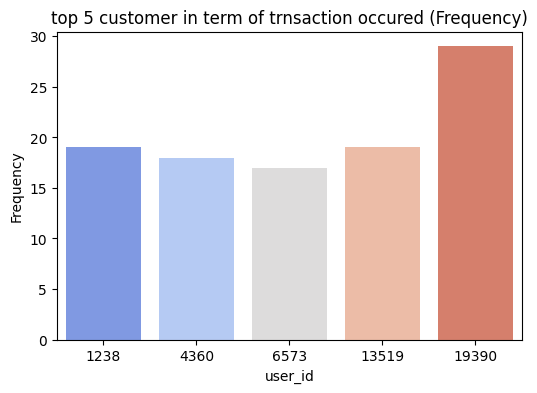

In [23]:
# Barplot chart Reflect the top 5 customer in term of total of trnsaction occured (Frequency).
plt.figure(figsize=(6, 4))
sns.barplot(x=top_user_freq .index, y=top_user_freq .values, palette='coolwarm')
plt.ylabel('Frequency')
plt.xlabel('user_id')
plt.title('top 5 customer in term of trnsaction occured (Frequency)')
plt.show()

# Preprocessing and Features Engineering 

## RFM : Recency, Frequency, Monetary Analysis
* RFM, a powerful customer segmentation technique, proves invaluable for marketers by swiftly categorizing customers into clusters. This enables targeted and personalized marketing strategies, leading to enhanced customer engagement and retention. By leveraging RFM segmentation, marketers can effectively tailor campaigns based on customer behavior, yielding higher response rates, increased loyalty, and extended customer lifetime.

## Using rfm liberary

In [24]:
# importing RFM liberary
from rfm import RFM  # if it is not installed use this code: !pip install rfm

In [25]:
# Get today's date
today = pd.Timestamp.today()

In [26]:
# Subtract trx_age from today's date to get datetime values
df['trx_datetime'] = today - pd.to_timedelta(df['trx_age'], unit='D')

In [27]:
df.head()

,trx_rank,points,trx_vlu,trx_age,customer_age,category,user_id,mer_name,trx_datetime
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders,2023-01-29 09:53:22.549685
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders,2023-01-20 09:53:22.549685
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders,2023-01-23 09:53:22.549685
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders,2022-07-17 09:53:22.549685
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders,2022-12-09 09:53:22.549685


In [28]:
r =RFM(df,customer_id='user_id',transaction_date='trx_datetime',amount='trx_vlu')

In [29]:
df_new = r.rfm_table
df_new

,user_id,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,22316,27,2,520.0,5,5,5,555,Champions
1,10718,26,2,3685.0,5,5,5,555,Champions
2,26438,5,4,2368.0,5,5,5,555,Champions
3,27370,19,2,620.1,5,5,5,555,Champions
4,5702,19,6,4009.0,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
33452,12995,295,1,100.0,1,1,1,111,Lost
33453,16917,306,1,38.9,1,1,1,111,Lost
33454,11903,286,1,97.0,1,1,1,111,Lost
33455,12982,301,1,94.0,1,1,1,111,Lost


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   trx_rank      43672 non-null  object        
 1   points        43672 non-null  object        
 2   trx_vlu       43672 non-null  object        
 3   trx_age       43672 non-null  object        
 4   customer_age  43672 non-null  object        
 5   category      43672 non-null  object        
 6   user_id       43672 non-null  int64         
 7   mer_name      43672 non-null  object        
 8   trx_datetime  43672 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 3.0+ MB


### 8. Who is the lost customers?

In [31]:
# we can filter by RFM score to find teh lsot customers.
df_new[df_new['rfm_score'] == '111']

,user_id,recency,frequency,monetary_value,r,f,m,rfm_score,segment
32986,15558,328,1,100.0,1,1,1,111,Lost
32987,11016,352,1,98.0,1,1,1,111,Lost
32988,15531,269,1,138.0,1,1,1,111,Lost
32989,10983,288,1,90.0,1,1,1,111,Lost
32990,15589,299,1,124.0,1,1,1,111,Lost
...,...,...,...,...,...,...,...,...,...
33452,12995,295,1,100.0,1,1,1,111,Lost
33453,16917,306,1,38.9,1,1,1,111,Lost
33454,11903,286,1,97.0,1,1,1,111,Lost
33455,12982,301,1,94.0,1,1,1,111,Lost


### 9. Who is the best Customers?

In [32]:
# we can filter by RFM score to find teh best VIP customers.
df_new[df_new['rfm_score'] == '444']

,user_id,recency,frequency,monetary_value,r,f,m,rfm_score,segment
9040,33290,84,1,360.0,4,4,4,444,Champions
9041,7402,53,1,320.0,4,4,4,444,Champions
9042,740,46,1,296.0,4,4,4,444,Champions
9043,9312,33,1,312.0,4,4,4,444,Champions
9044,5251,37,1,380.0,4,4,4,444,Champions
...,...,...,...,...,...,...,...,...,...
9301,33092,83,1,398.0,4,4,4,444,Champions
9302,3310,95,1,422.0,4,4,4,444,Champions
9303,4920,50,1,356.2,4,4,4,444,Champions
9304,8227,69,1,264.0,4,4,4,444,Champions


In [33]:
df_new.describe()

,recency,frequency,monetary_value,r,f,m
count,33457.000000,33457.000000,33457.000000,33457.000000,33457.000000,33457.000000
mean,159.501240,1.305317,432.353681,3.000000,3.000000,3.000000
std,115.681993,0.854738,1306.338905,1.414277,1.414277,1.414277
min,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,40.000000,1.000000,150.000000,2.000000,2.000000,2.000000
50%,153.000000,1.000000,216.000000,3.000000,3.000000,3.000000
75%,258.000000,1.000000,364.000000,4.000000,4.000000,4.000000
max,681.000000,29.000000,165183.800000,5.000000,5.000000,5.000000


In [34]:
# Segmentation metrics using RFM_segment
df_new.groupby('segment').agg({'recency':'mean','frequency':'mean','monetary_value':['mean','count']}).round(1)

recency frequency monetary_value      
                       mean      mean           mean count
segment                                                   
About to Sleep        234.6       1.0          155.9  2706
At Risk               287.8       1.3          736.7  4839
Champions              37.6       2.4         1049.5  4045
Lost                  297.5       1.0          127.1  5501
Low Spenders           96.7       1.2          127.1  4378
Loyal Accounts         93.0       1.4          456.2  5342
Need Attention        205.0       1.0          648.8  1277
New Active Accounts    19.8       1.0          131.6   450
Potential Loyalist    114.2       1.0          199.8  1826
Promising              39.0       1.0          416.5  3093

1. About to Sleep (2706 customers):
   * These customers have a relatively high recency (234.6 days) and low frequency (1.0) and monetary value (155.9).
   * They may have been active in the past but are showing signs of decreased engagement and may be at risk of becoming dormant.

2. At Risk (4839 customers):

   * Customers in this segment have a high recency (287.8 days) and relatively low frequency (1.3) and monetary value (736.7).
   * They require targeted strategies to re-engage them and prevent them from churning.

3. Champions (4045 customers):

   * These customers exhibit the shortest recency (37.6 days) and the highest frequency (2.4) and monetary value (1049.5).
   * They are highly engaged and represent the most valuable customer segment.

4. Lost (5501 customers):

   * Customers in this segment have the highest recency (297.5 days) and the lowest frequency (1.0) and monetary value (127.1).
   * They are inactive and may require special efforts to win back.

5. Low Spenders (4378 customers):

   * Customers in this segment have moderate recency (96.7 days) with frequency (1.2) and monetary value (127.1).
   * They may require incentives or personalized offers to increase their spending.

6. Loyal Accounts (5342 customers):

   * These customers have recency (93.0 days) with frequency (1.4) and monetary value (456.2).
   * They are consistent purchasers but may benefit from additional incentives to increase their spending.

7. Need Attention (1277 customers):

   * Customers in this segment have recency (205.0 days) with frequency (1.0) and monetary value (648.8).
   * They may require attention to prevent them from becoming inactive.

8. New Active Accounts (450 customers):

   * Customers in this segment have the shortest recency (19.8 days) and low frequency (1.0) and monetary value (131.6).
   * They are newly acquired customers and have the potential for growth with targeted marketing efforts.

9. Potential Loyalist (1826 customers):

   * Customers in this segment have moderate recency (114.2 days) with low frequency (1.0) and monetary value (199.8).
   * They may become more valuable with targeted engagement strategies.

10. Promising (3093 customers):

    * Customers in this segment have short recency (39.0 days) and moderate monetary value (416.5).
    * They have the potential to become more valuable with increased engagement and personalized offers.
   
By understanding the characteristics and numbers of customers in each RFM segment, businesses can tailor their marketing strategies to effectively engage and retain customers, ultimately driving growth and profitability.

In [35]:
# maping RFM segment to orignal data frame.
# Creating RFM segment dict
df_new['user_id'] = df_new['user_id'].astype('int')
rfm_segment_dict = df_new.set_index('user_id')['segment'].to_dict()
# creating RFM segment feature in original data frame df
data['rfm_segment'] = data['user_id'].map(rfm_segment_dict)
data.head()

,trx_rank,points,trx_vlu,trx_age,customer_age,category,user_id,mer_name,rfm_segment
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders,At Risk
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders,At Risk
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders,At Risk
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders,Champions
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders,At Risk


### 10. What are the top three merchants in each category for every RFM segment?

In [36]:
# creating list of RFM Segment
RFM_segment_list = data['rfm_segment'].unique().tolist()

# creating for loop in each unique segment
for segment in RFM_segment_list:
    # creating list for uniqe category for each unique segment
    group_segment = data[data['rfm_segment'] == segment]
    
    # Lopin inside segmetent group 
    for cat in group_segment['category'].unique():
        print(f'----- {segment} -----')
        print(f'*** {cat} ***')
        cat_data = group_segment[group_segment['category'] == cat]
        
        # get best three merchant base on segment and category group and by filtering and vlaue counts
        print(cat_data['mer_name'].value_counts().nlargest(3))
        print('*' * 50)

----- At Risk -----
*** Fashion ***
Agra Appliance Arena    476
Shankar Traders           4
Patna Paints Palace       2
Name: mer_name, dtype: int64
**************************************************
----- At Risk -----
*** F&B ***
Jai Hind General Stores    708
Gurgaon Gift Gallery       300
Mumbai Fashion Hub         232
Name: mer_name, dtype: int64
**************************************************
----- At Risk -----
*** Other ***
Ganpati Enterprises     9
Ahmedabad Sweet Mart    9
Name: mer_name, dtype: int64
**************************************************
----- At Risk -----
*** Grocery ***
Rajasthan Handicrafts    1870
Saraswati Fabrics        1087
Madurai Music Mania       712
Name: mer_name, dtype: int64
**************************************************
----- At Risk -----
*** Transportaion ***
Krishna Textiles    31
Name: mer_name, dtype: int64
**************************************************
----- At Risk -----
*** Health & Beauty ***
Indore Instrument Inn           21

## Segmentation using unsupervised learning, particularly K-means clustering

In [37]:
# Calculate RFM metric
rfm = data.groupby('user_id').agg({"customer_age":"min","trx_rank":"count","trx_vlu":"sum"})
#Rename columns
rfm.rename(columns={"customer_age":"recency","trx_rank":"frequency","trx_vlu":"monetary"},inplace=True)
# reseting index to user_id column as feature.
rfm = rfm.reset_index()
#Final RFM values
rfm

,user_id,recency,frequency,monetary
0,0,281,1,442.7
1,1,34,1,249.0
2,2,236,1,300.0
3,3,320,1,162.0
4,4,407,1,70.0
...,...,...,...,...
33452,33514,101,3,594.0
33453,33515,244,1,48.0
33454,33516,256,1,132.0
33455,33517,13,1,210.0


In [38]:
# using standard scaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency','frequency','monetary']])
rfm_scaled

array([[ 1.04176425, -0.35721104,  0.00792021],
       [-1.09350365, -0.35721104, -0.140359  ],
       [ 0.65274783, -0.35721104, -0.10131801],
       ...,
       [ 0.82564402, -0.35721104, -0.22992362],
       [-1.27504465, -0.35721104, -0.17021387],
       [-0.91196266,  1.98272232,  0.10383856]])

Text(0, 0.5, 'Inertia')

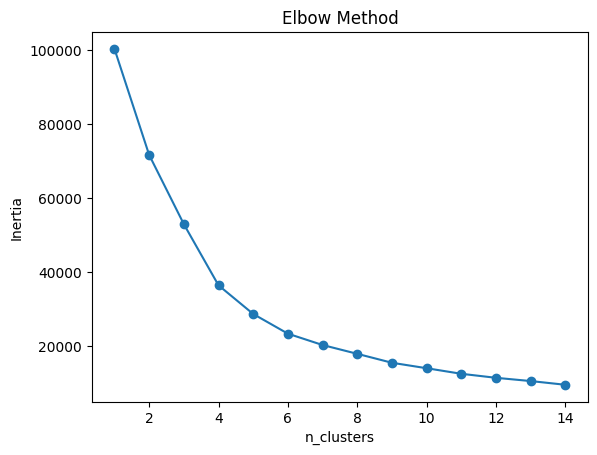

In [39]:
scores = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(rfm_scaled)
    scores.append(model.inertia_)
    
plt.plot(range(1,15),scores,marker='o')
plt.title("Elbow Method")
plt.xlabel("n_clusters")
plt.ylabel("Inertia")

* From the above Elbow Method gragh we chose 4 clusters for the KMeans model. as the different between intertia drop signifacantly.

In [40]:
# From the above Using n_clusters = 4
model = KMeans(n_clusters=4,random_state=4)
clusters = model.fit_predict(rfm_scaled)

In [41]:
# making rfm variable for KMeans clustering data frame.
rfm['clusters'] = clusters
rfm

,user_id,recency,frequency,monetary,clusters
0,0,281,1,442.7,0
1,1,34,1,249.0,1
2,2,236,1,300.0,0
3,3,320,1,162.0,0
4,4,407,1,70.0,0
...,...,...,...,...,...
33452,33514,101,3,594.0,2
33453,33515,244,1,48.0,0
33454,33516,256,1,132.0,0
33455,33517,13,1,210.0,1


In [42]:
# Segmentation metrics using RFM_segment
rfm.groupby('clusters').agg({'recency':'mean','frequency':'mean','monetary':['mean','count']}).round(1)

recency frequency  monetary       
            mean      mean      mean  count
clusters                                   
0          267.6       1.1     336.1  15817
1           61.8       1.2     371.2  15615
2           84.5       3.9    1575.1   2024
3           74.0      29.0  165183.8      1

1. Cluster 0 (15,817 customers):

   * These customers have a mean recency of 267.6 days, with a moderate frequency of 1.1 and a moderate monetary value of 336.1.
   * They represent a segment with moderate engagement and spending levels. 
   * We can consider them as Bronze level. (Lost customer,or about to lose)

2. Cluster 1 (15,615 customers):

   * Customers in this cluster have a relatively short recency of 61.8 days, with a slightly higher frequency of 1.2 and a similar    monetary value of 371.2.
   * They are more recently active compared to Cluster 0, but their spending behavior is comparable. (Promising customers)
   * We can consider them as Silver level.

3. Cluster 2 (2,024 customers):

   * This cluster comprises customers with a moderate recency of 84.5 days, a high frequency of 3.9, and a substantial monetary value of 1575.1.
   * They represent highly engaged and valuable customers who make frequent purchases with significant monetary value.
   * We can consider them as Gold level. (Loyal customers)

4. Cluster 3 (1 customer):

   * This cluster includes only one customer who has an exceptionally high frequency of 29.0 and an extremely high monetary value of 165,183.8, with a relatively short recency of 74.0 days.
   * This customer stands out as a high-value and highly engaged individual, likely representing a VIP or top-tier customer.
   * We can consider it as Platinum level.
   
By understanding the characteristics and numbers of customers in each K-means cluster RFM segment, businesses can tailor their marketing strategies to effectively engage and retain customers, ultimately driving growth and profitability.

In [43]:
# represinting KMean clusters as Bronze, Silver, Gold, Platinum segment. 
cluster_segment_dict = {0:'Bronze', 1:'Silver', 2:'Gold', 3:'Platinum'}
rfm['KMean_segment'] = rfm['clusters'].map(cluster_segment_dict)

# maping RFM KMmean_clusters to orignal data frame.
# Creating RFM segment dict
rfm_KMeanSeg_dict = rfm.set_index('user_id')['KMean_segment'].to_dict()
# creating RFM segment feature in original data frame df
data['kMean_segment'] = data['user_id'].map(rfm_KMeanSeg_dict)
data.head()

,trx_rank,points,trx_vlu,trx_age,customer_age,category,user_id,mer_name,rfm_segment,kMean_segment
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders,At Risk,Bronze
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders,At Risk,Bronze
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders,At Risk,Bronze
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders,Champions,Gold
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders,At Risk,Bronze


## Segmentation using Agglomerative Clustering

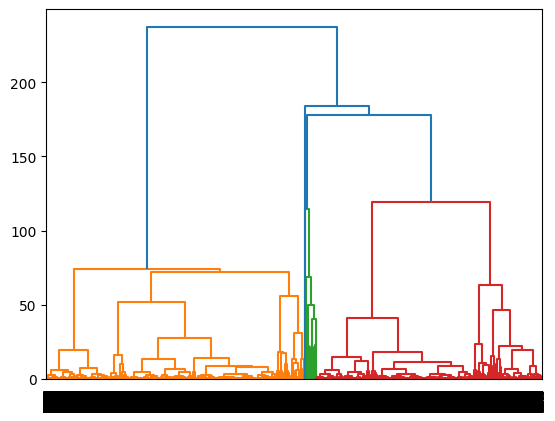

In [44]:
# using dendogram to identify numbers of clusters for Agglomerative model
dend = sch.dendrogram(sch.linkage(rfm_scaled, method="ward"))

* From The dendogram the highest leg almost 180 - 120 = 60 when we divide the data base on it gives us 4 clusters. we are going to use 4 clusters in the Agglomerative model

In [45]:
# using Agglomerative mode
model = AgglomerativeClustering(n_clusters=4)
Agg_clusters = model.fit_predict(rfm_scaled)

In [46]:
# making rfm variable for Agg. clustering data frame.
rfm['Agg_clusters'] = Agg_clusters
rfm

,user_id,recency,frequency,monetary,clusters,KMean_segment,Agg_clusters
0,0,281,1,442.7,0,Bronze,3
1,1,34,1,249.0,1,Silver,0
2,2,236,1,300.0,0,Bronze,3
3,3,320,1,162.0,0,Bronze,3
4,4,407,1,70.0,0,Bronze,3
...,...,...,...,...,...,...,...
33452,33514,101,3,594.0,2,Gold,0
33453,33515,244,1,48.0,0,Bronze,3
33454,33516,256,1,132.0,0,Bronze,3
33455,33517,13,1,210.0,1,Silver,0


In [49]:
# Segmentation metrics using Agg_clusters
rfm.groupby('Agg_clusters').agg({'recency':'mean','frequency':'mean','monetary':['mean','count']}).round(1)

recency frequency  monetary       
                mean      mean      mean  count
Agg_clusters                                   
0               52.9       1.4     408.0  15257
1               89.6       5.0    3245.5    714
2               74.0      29.0  165183.8      1
3              257.3       1.1     329.3  17485

1. Agglomerative Cluster 0 (15,257 customers):

   * Customers in this cluster have a relatively short mean recency of 52.9 days, with a moderate frequency of 1.4 and a moderate monetary value of 408.0.
   * They represent a segment of recently active customers with moderate spending behavior.
   * We can consider them as Silver level. (Promising customers)

2. Agglomerative Cluster 1 (714 customers):

   * This cluster comprises customers with a moderate mean recency of 89.6 days, a high frequency of 5.0, and a substantial mean monetary value of 3,245.5.
   * These customers are highly engaged and represent a valuable segment with frequent purchases and significant monetary value.
   * * We can consider them as Gold level.(Loyal customers)

3. Agglomerative Cluster 2 (1 customer):

   * Cluster 2 includes only one customer who has an exceptionally high frequency of 29.0 and an extremely high monetary value of 165,183.8, with a relatively short recency of 74.0 days.
   * This customer stands out as a high-value and highly engaged individual, likely representing a VIP or top-tier customer.
   * We can consider it as Platinum level.

4. Agglomerative Cluster 3 (17,485 customers):

   * Customers in this cluster have a higher mean recency of 257.3 days, with lower frequency of 1.1 and a mean monetary value of 329.3.
   * They represent a segment of less recently active customers with moderate spending behavior. (Lost customer,or about to lose)
   * We can consider it as Bronze level.
   
   
These insights offer valuable information about the different customer segments identified by the Agglomerative clustering algorithm. Businesses can leverage this information to tailor their marketing strategies, customer engagement initiatives, and retention efforts to better meet the needs and preferences of each customer segment, ultimately driving business growth and improving customer satisfaction.

In [50]:
# represinting Agg. clusters as Bronze, Silver, Gold, Platinum segment. 
agg_segment_dict = {0:'Silver', 1:'Gold', 2:'Platinum', 3:'Bronze'}
rfm['Agg_segment'] = rfm['Agg_clusters'].map(agg_segment_dict)

# maping RFM Agg_segment to orignal data frame.
# Creating RFM segment dict
rfm_agg_dict = rfm.set_index('user_id')['Agg_segment'].to_dict()
# creating RFM segment feature in original data frame df
data['Agg_segment'] = data['user_id'].map(rfm_agg_dict)
data.head()

,trx_rank,points,trx_vlu,trx_age,customer_age,category,user_id,mer_name,rfm_segment,kMean_segment,Agg_segment
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders,At Risk,Bronze,Bronze
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders,At Risk,Bronze,Bronze
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders,At Risk,Bronze,Bronze
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders,Champions,Gold,Silver
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders,At Risk,Bronze,Bronze


### 11. What type of segmentation better to use for this data and project objective?

In [60]:
# Percentage of each kMean_segment in the data 
data.kMean_segment.value_counts()/data.shape[0]

Silver      0.436000
Bronze      0.384434
Gold        0.178902
Platinum    0.000664
Name: kMean_segment, dtype: float64

In [62]:
# Percentage of each Agg_segment in the data
data.Agg_segment.value_counts()/data.shape[0]

Silver      0.481155
Bronze      0.435771
Gold        0.082410
Platinum    0.000664
Name: Agg_segment, dtype: float64

* When comparing the above kMeans_segment and Agg_segment percentages:

  - Bronze accounts for 38.4% in kMeans_segment and almost 43.6% in Agg_segment percentage.
  - Silver accounts for 43.6% in kMeans_segment and almost 48.1% in Agg_segment percentage.
  - Gold accounts for 17.9% in kMeans_segment and almost 0.08% in Agg_segment percentage.
  - Platinum remains the same as it represents only one customer in the data.
  
Upon reviewing the comparison above, I lean towards KMeans segmentation as it offers a better representation of the data, especially in the gold segment. Nevertheless, I favor the RFM library segmentation for its ability to provide more refined insights into customer behavior and interests, thereby enhancing targeted campaigns.

In [183]:
# creating user_id list
user_list = data.user_id.unique().tolist()

# using joblib liberary to dump user list
joblib.dump(user_list,'user_list.pkl')

['user_list.pkl']

In [203]:
# saving file after segmentation deployment step.
data.to_csv('segmented_data.csv',index=False)

## Deployment Step:

* Creating and testing function for the deployment step

In [171]:
# Retrieve the RFM segment value for the user
rfm_segment_value = data[data['user_id'] == 27075]['rfm_segment'].iloc[0]
    
# Group data by the RFM segment value
group_segment = data[data['rfm_segment'] == rfm_segment_value]
    
# Get the total points in the user's account wallet
total_points = data[data['user_id'] == 27075]['points'].sum()
    
print('*' * 100)
# Print user message
print(f"Dear Valued Customer {27075},\n")
print(f"We'd like to remind you that you currently have {total_points} points in your account wallet, equivalent  to {total_points * 0.1}. \nYou can use these points to shop from our carefully selected list of premier merchants across various categories:\n")
    
# Iterate over unique categories in the user's group_segment
for category in group_segment['category'].unique():
    # Get data for each specific category in the user's group_segment
    cat_data = group_segment[group_segment['category'] == category]
        
    print(f'Category: **{category}**\n')
    # Print the list of best 3 merchants per user category
    print(f"{cat_data['mer_name'].value_counts().nlargest(3).index.tolist()}\n")
     
print('Thank you for being a valued member of our community!\n')
print('Best Regards,\n')
print('*' * 100) 
print('*' * 100)

****************************************************************************************************
Dear Valued Customer 27075,

We'd like to remind you that you currently have 9000 points in your account wallet, equivalent  to 900.0. 
You can use these points to shop from our carefully selected list of premier merchants across various categories:

Category: **Fashion**

['Agra Appliance Arena', 'Faridabad Footwear Fair', 'Delhi Electronics']

Category: **Other**

['Ganpati Enterprises', 'Kolkata Carpets Corner', 'Ahmedabad Sweet Mart']

Category: **Grocery**

['Rajasthan Handicrafts', 'Madurai Music Mania', 'Saraswati Fabrics']

Category: **Transportaion**

['Krishna Textiles']

Category: **Electronics**

['Thane Tea Traders', 'Gwalior Garden Gear', 'Trichy Tailoring Trends']

Category: **F&B**

['Jai Hind General Stores', 'Mumbai Fashion Hub', 'Amritsar Auto Accessories']

Category: **Health & Beauty**

['Indore Instrument Inn', 'Hyderabad Spices Bazaar', 'Lucknow Leather World']

T

In [178]:
# Creating a function that takes user ID and provides the best merchants for each category of customer interest.
def user_best_merch(user_id):
    # Retrieve the RFM segment value for the user
    rfm_segment_value = data[data['user_id'] == user_id]['rfm_segment'].iloc[0]
    
    # Group data by the RFM segment value
    group_segment = data[data['rfm_segment'] == rfm_segment_value]
    
    # Get the total points in the user's account wallet
    total_points = data[data['user_id'] == user_id]['points'].sum()
    
    print('*' * 100)
    # Print user message
    print(f"Dear Valued Customer {user_id},\n")
    print(f"We'd like to remind you that you currently have ({total_points}) points in your account wallet, equivalent to ({total_points * 0.1}). \nYou can use these points to shop from our carefully selected list of premier merchants across various categories:\n")
    
    # Iterate over unique categories in the user's group_segment
    for category in group_segment['category'].unique():
        # Get data for each specific category in the user's group_segment
        cat_data = group_segment[group_segment['category'] == category]
        
        print(f'Category: **{category}**\n')
        # Print the list of best 3 merchants per user category
        print(f"{cat_data['mer_name'].value_counts().nlargest(3).index.tolist()}\n")
     
    print('Thank you for being a valued member of our community!\n')
    print('Best Regards,\n')
    print('*' * 100) 
    print('*' * 100)


In [192]:
# Testing user function with diffrent user_id and rfm segment
user_best_merch(21053)

****************************************************************************************************
Dear Valued Customer 21053,

We'd like to remind you that you currently have (20140) points in your account wallet, equivalent to (2014.0). 
You can use these points to shop from our carefully selected list of premier merchants across various categories:

Category: **Fashion**

['Agra Appliance Arena', 'Shankar Traders', 'Patna Paints Palace']

Category: **F&B**

['Jai Hind General Stores', 'Gurgaon Gift Gallery', 'Mumbai Fashion Hub']

Category: **Other**

['Ganpati Enterprises', 'Ahmedabad Sweet Mart']

Category: **Grocery**

['Rajasthan Handicrafts', 'Saraswati Fabrics', 'Madurai Music Mania']

Category: **Transportaion**

['Krishna Textiles']

Category: **Health & Beauty**

['Indore Instrument Inn', 'Vijayawada Vegetable Village', 'Hyderabad Spices Bazaar']

Category: **Electronics**

['Gwalior Garden Gear', 'Nagpur Novelty Nook', 'Thane Tea Traders']

Thank you for being a valued m

#### The reason we choose to filter merchant names by category for each RFM segment is due to the varying preferences among RFM segments and different preferences for merchant names within each segment.

In [217]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import sklearn

# Loading the dataset
data = pd.read_csv('segmented_data.csv')

# Loading the user list
user_list = joblib.load('user_list.pkl')

# Creating a function that takes user ID and provides the best merchants for each category of customer interest
def user_best_merch(user_id):
    # Retrieve the RFM segment value for the user
    rfm_segment_value = data[data['user_id'] == user_id]['rfm_segment'].iloc[0]
    
    # Group data by the RFM segment value
    group_segment = data[data['rfm_segment'] == rfm_segment_value]
    
    # Get the total points in the user's account wallet
    total_points = data[data['user_id'] == user_id]['points'].sum()
    
    # Prepare the message
    message = f"Dear Valued Customer {user_id},\n\n"
    message += f"We'd like to remind you that you currently have ({total_points}) points in your account wallet, \nequivalent to ({total_points * 0.1})."
    message += " You can use these points to shop from our carefully selected \nlist of premier merchants across various categories:\n\n"
    
    # Iterate over unique categories in the user's group_segment
    for category in group_segment['category'].unique():
        # Get data for each specific category in the user's group_segment
        cat_data = group_segment[group_segment['category'] == category]
        
        message += f'Category: **{category}**\n'
        # Add the list of best 3 merchants per user category to the message
        message += f"{cat_data['mer_name'].value_counts().nlargest(3).index.tolist()}\n\n"
     
    message += 'Thank you for being a valued member of our community!\n\n'
    message += 'Best Regards,\n'
    
    return message


def main():
    st.title('User Targeted Offers')
    
    user_id = st.selectbox('Select user_id', user_list)
    
    if st.button(f"Target Offers for user with user id = {user_id}"):
        result = user_best_merch(user_id)
        st.write("User Target Offer")
        st.text(result)  # Display the message returned by the function

main()

Overwriting app.py
